In [220]:
from colormaps_dataset import cmap_dataframe, generate_cmap_data, get_cmap_data
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from skimage.io import imread
from matplotlib.pyplot import imshow, subplots, tight_layout, imsave
from matplotlib import image
import random
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import block_reduce
import pandas as pd
import matplotlib as mpl
from PIL import Image as im 


In [229]:
df = cmap_dataframe()
df.head(5)
# df.category.unique()

,category,cmap_name,n,red,green,blue,alpha
0,Perceptually Uniform Sequential,viridis,0,0.267004,0.004874,0.329415,1.0
1,Perceptually Uniform Sequential,viridis,1,0.268510,0.009605,0.335427,1.0
2,Perceptually Uniform Sequential,viridis,2,0.269944,0.014625,0.341379,1.0
3,Perceptually Uniform Sequential,viridis,3,0.271305,0.019942,0.347269,1.0
4,Perceptually Uniform Sequential,viridis,4,0.272594,0.025563,0.353093,1.0


In [238]:
df[df.category == "Cyclic"].groupby(["category", "cmap_name"]).size().sort_values(ascending=False)

category  cmap_name       
Cyclic    twilight            510
          twilight_shifted    510
          hsv                 256
dtype: int64

### Tensor

For initial experimentation purposes I am going to treat this as a task to define a color ramp so I'll treat each colormap as if it were an image.

This gives a tensor of (1, N, 3)

1 height by N width with 3 rgb channels in the range of [0,1]

The majority of the colormaps have a predefined N of 256 so I'll need to resize the Qualitative colormaps, which are N < 20, up to 256 and `twilight` and `twilight_shifted`  down to 256.

```shell
category     cmap_name
Qualitative  tab20        20
             tab20b       20
             tab20c       20
             Paired       12
             Set3         12
             tab10        10
             Pastel1       9
             Set1          9
             Accent        8
             Dark2         8
             Pastel2       8
             Set2          8
dtype: int64
```
```shell
category  cmap_name       
Cyclic    twilight            510
          twilight_shifted    510
          hsv                 256
dtype: int64
```

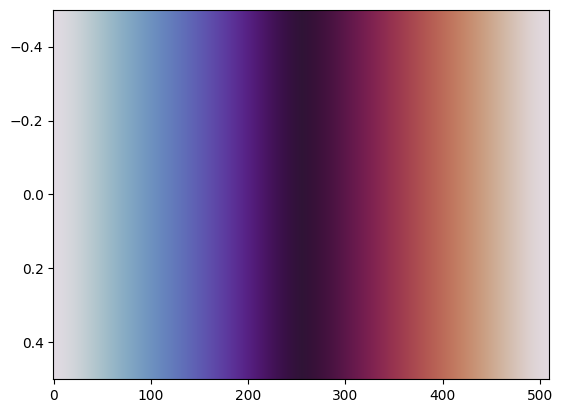

In [241]:
# Resize twilight from N=510 -> N=256
img1 = np.array([df[df.cmap_name == 'twilight'][["red", "green", "blue"]]])
ax = imshow(img1, aspect='auto')

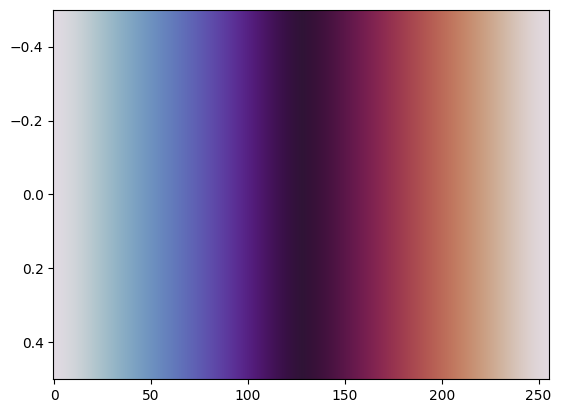

In [242]:
img1 = resize(img1, (1, 256))
ax = imshow(img1, aspect='auto')

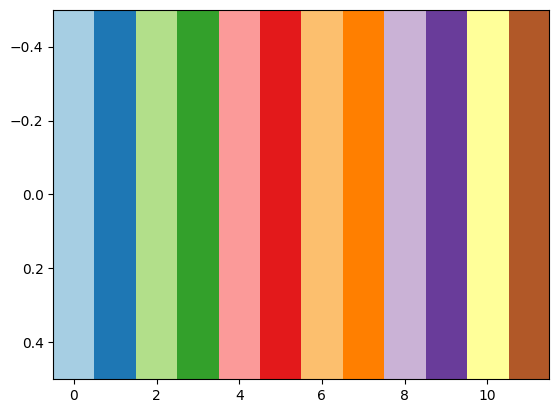

In [244]:
# Resize Paired from N=12 -> N=256
img1 = np.array([df[df.cmap_name == 'Paired'][["red", "green", "blue"]]])
ax = imshow(img1, aspect='auto')

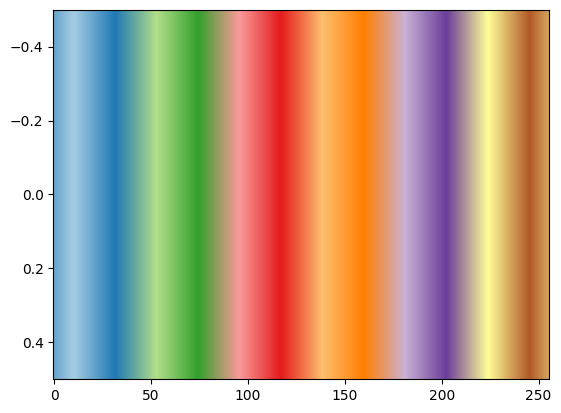

In [245]:
img1 = resize(img1, (1, 256))
ax = imshow(img1, aspect='auto')